# PROYECTO W4



## Estudio sobre los suicidios en el mundo, filtrado por sexo intervalo de tiempos y países. 



Importamos las librerías necesarias para el programa:

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leemos el fichero CSV:


In [303]:
df = pd.read_csv('who_suicide_statistics.csv')
df

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


Nos quitamos datos nulos de varias columnas:  



In [304]:
df = df.dropna()
df

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0


Consultamos los valores de diversas columnas para un mejor filtrado: 

In [305]:
df['year'].value_counts()

year
2009    1200
2010    1200
2011    1188
2001    1188
2007    1176
2006    1164
2003    1164
2002    1164
2008    1164
2004    1152
2005    1152
2000    1140
2013    1128
2012    1128
2014    1080
1999    1068
1998    1032
1997    1008
1996     996
1995     984
1994     936
1987     924
1990     900
1993     888
1992     888
1991     876
1985     852
1989     852
1986     840
2015     840
1988     828
1981     756
1982     732
1984     624
1983     600
1980     600
1979     432
2016     216
Name: count, dtype: int64

Filtraremos los datos en un intervalo de 20 años, del 90 al 2010, ambos inclusive: 

In [306]:
df = df[(df["year"] >= 1990) & (df["year"] <= 2010)]
df

,country,year,sex,age,suicides_no,population
84,Albania,1992,female,15-24 years,7.0,292400.0
85,Albania,1992,female,25-34 years,4.0,267400.0
86,Albania,1992,female,35-54 years,2.0,323100.0
87,Albania,1992,female,5-14 years,0.0,336700.0
88,Albania,1992,female,55-74 years,1.0,164900.0
...,...,...,...,...,...,...
43723,Virgin Islands (USA),2010,male,25-34 years,1.0,5472.0
43724,Virgin Islands (USA),2010,male,35-54 years,2.0,14141.0
43725,Virgin Islands (USA),2010,male,5-14 years,0.0,7510.0
43726,Virgin Islands (USA),2010,male,55-74 years,1.0,11537.0


Miramos ahora los valores que tenemos por cada país para filtrar los países con poca muestra de datos: 

In [307]:
with pd.option_context('display.max_rows', None):
    print(df['country'].value_counts())

country
Latvia                                252
Mexico                                252
Finland                               252
France                                252
Russian Federation                    252
Germany                               252
Greece                                252
Romania                               252
Republic of Moldova                   252
Guatemala                             252
Hong Kong SAR                         252
Hungary                               252
Iceland                               252
Ireland                               252
Israel                                252
Italy                                 252
Republic of Korea                     252
Japan                                 252
Kazakhstan                            252
Puerto Rico                           252
Kyrgyzstan                            252
Lithuania                             252
Luxembourg                            252
Norway                    

Hacemos la comprobación para verlo mejor: 

In [308]:
df = df[~df['country'].isin(df['country'].value_counts()[df['country'].value_counts() < 100].index)]
with pd.option_context('display.max_rows', None):
    print(df['country'].value_counts())

country
Hong Kong SAR                         252
Ukraine                               252
Greece                                252
Turkmenistan                          252
Guatemala                             252
Hungary                               252
Iceland                               252
Ireland                               252
Israel                                252
Italy                                 252
Trinidad and Tobago                   252
Japan                                 252
Kazakhstan                            252
Kyrgyzstan                            252
Latvia                                252
Lithuania                             252
Luxembourg                            252
Malta                                 252
Mauritius                             252
Mexico                                252
Netherlands                           252
New Zealand                           252
Norway                                252
Sweden                    

Ahora vamos a convertir los tipos de datos para tenerlo más preciso y mejorar el rendimiento: 

In [309]:
df = df.copy()
df['year'] = df['year'].astype("int16")
df['suicides_no'] = df['suicides_no'].astype("int16")
df['population'] = df['population'].astype("int32")
df['country'] = df['country'].astype("string")
df['sex'] = df['sex'].astype("string")

Calculamos el porcentaje de suicidios por cada 100000 personas y agregamos la columna al final de la tabla:



In [310]:
data = {'suicides', 'population'}
def calcular_porcentaje_suicidios(row):
    return (row['suicides_no'] / row['population']) * 100000
df['Suicidios x100000'] = df.apply(calcular_porcentaje_suicidios, axis=1)
df

,country,year,sex,age,suicides_no,population,Suicidios x100000
84,Albania,1992,female,15-24 years,7,292400,2.393981
85,Albania,1992,female,25-34 years,4,267400,1.495886
86,Albania,1992,female,35-54 years,2,323100,0.619003
87,Albania,1992,female,5-14 years,0,336700,0.000000
88,Albania,1992,female,55-74 years,1,164900,0.606428
...,...,...,...,...,...,...,...
43723,Virgin Islands (USA),2010,male,25-34 years,1,5472,18.274854
43724,Virgin Islands (USA),2010,male,35-54 years,2,14141,14.143271
43725,Virgin Islands (USA),2010,male,5-14 years,0,7510,0.000000
43726,Virgin Islands (USA),2010,male,55-74 years,1,11537,8.667765


Ahora limpiamos los datos de los paises para que no haya errores: 

In [311]:
df['country'] = df['country'].replace('\(USA\)','', regex = True)
df['country'] = df['country'].replace('\(Bolivarian Republic of\)','', regex = True)
df

,country,year,sex,age,suicides_no,population,Suicidios x100000
84,Albania,1992,female,15-24 years,7,292400,2.393981
85,Albania,1992,female,25-34 years,4,267400,1.495886
86,Albania,1992,female,35-54 years,2,323100,0.619003
87,Albania,1992,female,5-14 years,0,336700,0.000000
88,Albania,1992,female,55-74 years,1,164900,0.606428
...,...,...,...,...,...,...,...
43723,Virgin Islands,2010,male,25-34 years,1,5472,18.274854
43724,Virgin Islands,2010,male,35-54 years,2,14141,14.143271
43725,Virgin Islands,2010,male,5-14 years,0,7510,0.000000
43726,Virgin Islands,2010,male,55-74 years,1,11537,8.667765


Añadiremos una columna nueva para comprobar el continente del país. Para ello creamos una lista de países para cada continente: 

In [312]:
europa = ['Ukraine', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Sweden', 'Spain', 'Romania', 'Russian Federation', 'Slovenia', 'Germany', 'France', 'Belgium', 'Czech Republic', 'Bulgaria', 'Estonia', 'United Kingdom', 'Finland', 'Austria', 'TFYR Macedonia', 'Poland', 'Albania', 'Slovakia', 'Portugal', 'Belarus','Denmark','Switzerland','Azerbaijan','Croatia', 'Serbia', 'Montenegro', 'Cyprus']

america = ['Guatemala','Trinidad and Tobago','Mexico','Puerto Rico','United States of America','Colombia','Costa Rica', 'Chile','Canada','Ecuador','Brazil','Argentina','Saint Lucia','Guyana','El Salvador','Belize','Suriname', 'Venezuela ', 'Paraguay', 'Cuba', 'Uruguay','Bahamas','Antigua and Barbuda','Saint Vincent and Grenadines','Barbados','Grenada','Panama', 'Virgin Islands ', 'Aruba', 'Martinique', 'Jamaica', 'Guadeloupe', 'French Guiana', 'Reunion']

africa = ['South Africa', 'Egypt', 'Seychelles']

asia = ['Hong Kong SAR','Israel','Japan','Kazakhstan','Kyrgyzstan','Republic of Korea','Republic of Moldova','Singapore','Turkmenistan','Armenia','Thailand','Uzbekistan','Kuwait', 'Brunei Darussalam', 'Mauritius', 'Georgia', 'Philippines', 'Bahrain', 'Qatar', 'Sri Lanka', 'Maldives']

oceania = ['New Zealand','Australia', 'Kiribati', 'Fiji']

Generamos una nueva columna llamada 'continent' con valores de la tabla, para no buscarnos muchos problemas: 

In [313]:
df["continent"] = df["country"]
df['continent'] = df['continent'].replace(europa,'Europa', regex = True)
df['continent'] = df['continent'].replace(america,'America', regex = True)
df['continent'] = df['continent'].replace(africa,'Africa', regex = True)
df['continent'] = df['continent'].replace(asia,'Asia', regex = True)
df['continent'] = df['continent'].replace(oceania,'Oceania', regex = True)
df = df.reindex(columns=['country', 'continent','year', 'sex', 'age', 'suicides_no', 'population'])
df

,country,continent,year,sex,age,suicides_no,population
84,Albania,Europa,1992,female,15-24 years,7,292400
85,Albania,Europa,1992,female,25-34 years,4,267400
86,Albania,Europa,1992,female,35-54 years,2,323100
87,Albania,Europa,1992,female,5-14 years,0,336700
88,Albania,Europa,1992,female,55-74 years,1,164900
...,...,...,...,...,...,...,...
43723,Virgin Islands,America,2010,male,25-34 years,1,5472
43724,Virgin Islands,America,2010,male,35-54 years,2,14141
43725,Virgin Islands,America,2010,male,5-14 years,0,7510
43726,Virgin Islands,America,2010,male,55-74 years,1,11537


Comprobamos los continentes que tenemos para ver si lo hemos hecho bien: 

In [314]:
df['continent'].value_counts()

continent
Europa     9132
America    7320
Asia       4452
Oceania     732
Africa      432
Name: count, dtype: Int64

Guardamos los datos en un fichero nuevo:

In [315]:
df_l = df.to_csv('datos_limpios.csv')

Agrupamos por país, genero y edad la suma de los suicidios:

In [316]:
total_suicides_by_sex_age = df.groupby(['country','sex', 'age'])['suicides_no'].sum()
total_suicides_by_sex_age

country          sex     age        
Albania          female  15-24 years    226
                         25-34 years    128
                         35-54 years    156
                         5-14 years      21
                         55-74 years     64
                                       ... 
Virgin Islands   male    25-34 years     15
                         35-54 years     30
                         5-14 years       1
                         55-74 years     13
                         75+ years        6
Name: suicides_no, Length: 1212, dtype: int64

Ahora vamos a extraer los datos de España: 

In [317]:
spain = df[df['country'] == 'Spain']
total_suicides_by_sex_age_spain = spain.groupby(['country','sex', 'age'])['suicides_no'].sum()
with pd.option_context('display.max_rows', None):
    print(total_suicides_by_sex_age_spain)

country  sex     age        
Spain    female  15-24 years     1019
                 25-34 years     1851
                 35-54 years     4623
                 5-14 years        60
                 55-74 years     5595
                 75+ years       3326
         male    15-24 years     4283
                 25-34 years     8018
                 35-54 years    15177
                 5-14 years       157
                 55-74 years    14414
                 75+ years       9552
Name: suicides_no, dtype: int16


Extraemos los datos también para Europa:

In [318]:
europe = df[df['continent'] == 'Europa']
total_suicides_by_sex_age_europe = europe.groupby(['country','sex', 'age'])['suicides_no'].sum()
with pd.option_context('display.max_rows', None):
    print(total_suicides_by_sex_age_europe)

country             sex     age        
Albania             female  15-24 years       226
                            25-34 years       128
                            35-54 years       156
                            5-14 years         21
                            55-74 years        64
                            75+ years          36
                    male    15-24 years       243
                            25-34 years       256
                            35-54 years       373
                            5-14 years         40
                            55-74 years       185
                            75+ years          38
Austria             female  15-24 years       475
                            25-34 years       806
                            35-54 years      2658
                            5-14 years         33
                            55-74 years      2541
                            75+ years        1857
                    male    15-24 years      2243
          

In [335]:
total_suicides_by_sex_sp = spain.groupby(['country','sex'])['suicides_no'].sum()
total_suicides_by_sex_sp

country  sex   
Spain    female    16474
         male      51601
Name: suicides_no, dtype: int64

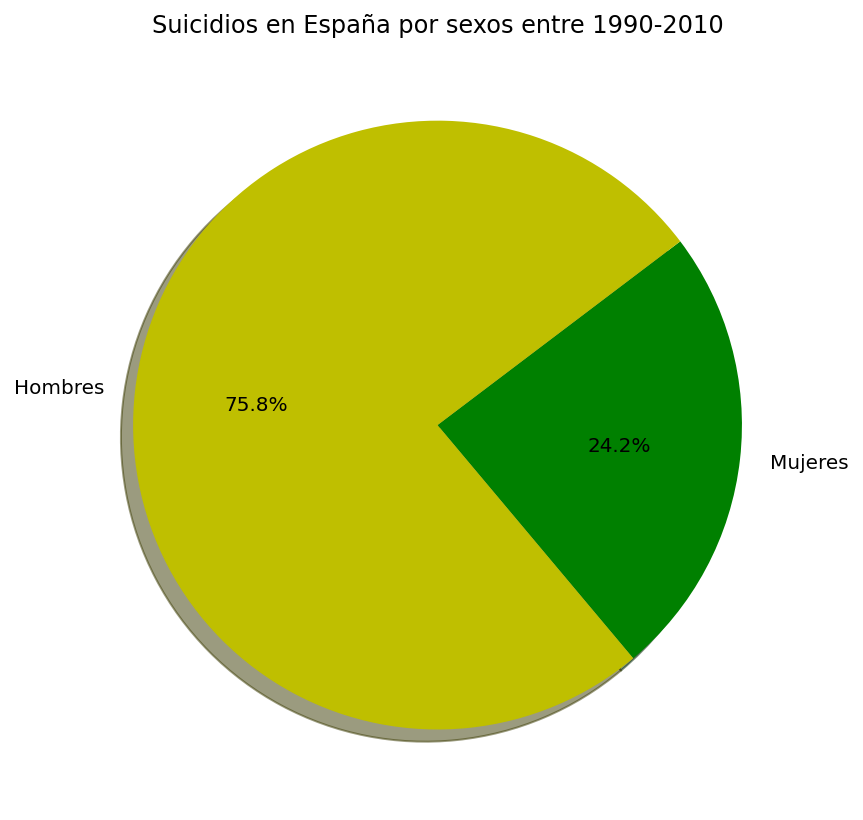

In [337]:
sc_fem_to_sp = total_suicides_by_sex_sp[0]
sc_ma_to_sp = total_suicides_by_sex_sp[1]
plt.pie(
    # Valores a representar
    [sc_fem_to_sp, sc_ma_to_sp],
    # Etiquetas
    labels = ['Mujeres', 'Hombres'],
    # Sombra
    shadow = True,
    # Colores
    colors = ['g', 'y'],
    # Ángulo de inicio
    startangle = 310,
    # Mostramos el valor como un valor porcentual con un dígito decimal
    autopct = '%1.1f%%'
    )

# Especificamos el título del gráfico
plt.title("Suicidios en España por sexos entre 1990-2010")

# Mostramos el gráfico
plt.show()

In [331]:
total_suicides_by_sex_eu = europe.groupby(['sex'])['suicides_no'].sum()
total_suicides_by_sex_eu

sex
female     575023
male      2132684
Name: suicides_no, dtype: int64

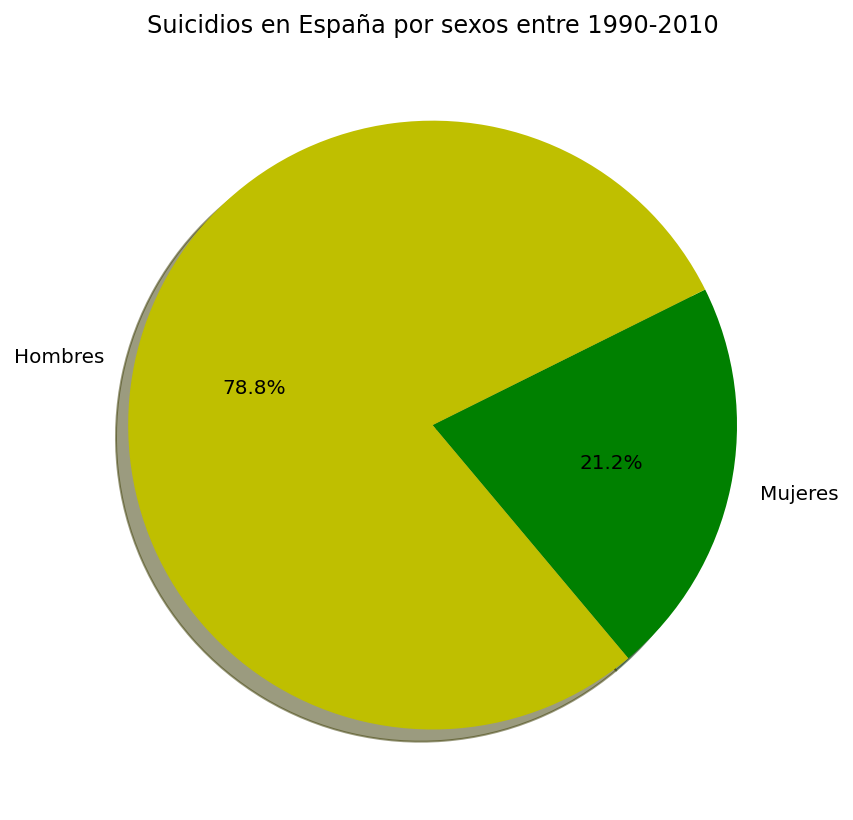

In [338]:
sc_fem_to_eu = total_suicides_by_sex_eu[0]
sc_ma_to_eu = total_suicides_by_sex_eu[1]
plt.pie(
    # Valores a representar
    [sc_fem_to_eu, sc_ma_to_eu],
    # Etiquetas
    labels = ['Mujeres', 'Hombres'],
    # Sombra
    shadow = True,
    # Colores
    colors = ['g', 'y'],
    # Ángulo de inicio
    startangle = 310,
    # Mostramos el valor como un valor porcentual con un dígito decimal
    autopct = '%1.1f%%'
    )

# Especificamos el título del gráfico
plt.title("Suicidios en Europa por sexos entre 1990-2010")

# Mostramos el gráfico
plt.show()

In [346]:
total_suicides_by_age_sp = spain.groupby(['country','age'])['suicides_no'].sum()
total_suicides_by_age_sp

country  age        
Spain    15-24 years     5302
         25-34 years     9869
         35-54 years    19800
         5-14 years       217
         55-74 years    20009
         75+ years      12878
Name: suicides_no, dtype: int16

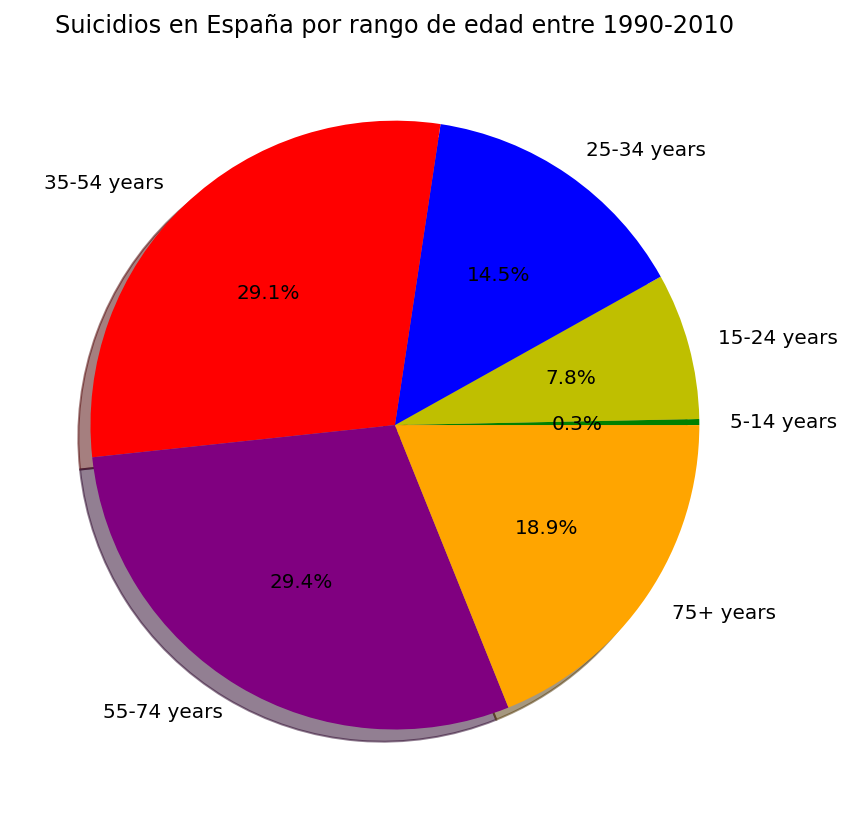

In [351]:
sc_15_24_to_sp = total_suicides_by_age_sp[0]
sc_25_34_to_sp = total_suicides_by_age_sp[1]
sc_35_54_to_sp = total_suicides_by_age_sp[2]
sc_5_14_to_sp = total_suicides_by_age_sp[3]
sc_55_74_to_sp = total_suicides_by_age_sp[4]
sc_75_to_sp = total_suicides_by_age_sp[5]
plt.pie(
    # Valores a representar
    [sc_5_14_to_sp, sc_15_24_to_sp, sc_25_34_to_sp, sc_35_54_to_sp, sc_55_74_to_sp, sc_75_to_sp],
    # Etiquetas
    labels = ['5-14 years', '15-24 years', '25-34 years', '35-54 years',  '55-74 years', '75+ years'],
    # Sombra
    shadow = True,
    # Colores
    colors = ['g', 'y', 'b', 'r', 'purple', 'orange'],
    # Ángulo de inicio
    startangle = 0,
    # Mostramos el valor como un valor porcentual con un dígito decimal
    autopct = '%1.1f%%'
    )

# Especificamos el título del gráfico
plt.title("Suicidios en España por rango de edad entre 1990-2010")

# Mostramos el gráfico
plt.show()

In [353]:
total_suicides_by_age_eu = europe.groupby(['age'])['suicides_no'].sum()
total_suicides_by_age_eu

age
15-24 years     262796
25-34 years     424049
35-54 years    1044315
5-14 years       14831
55-74 years     694472
75+ years       267244
Name: suicides_no, dtype: int64

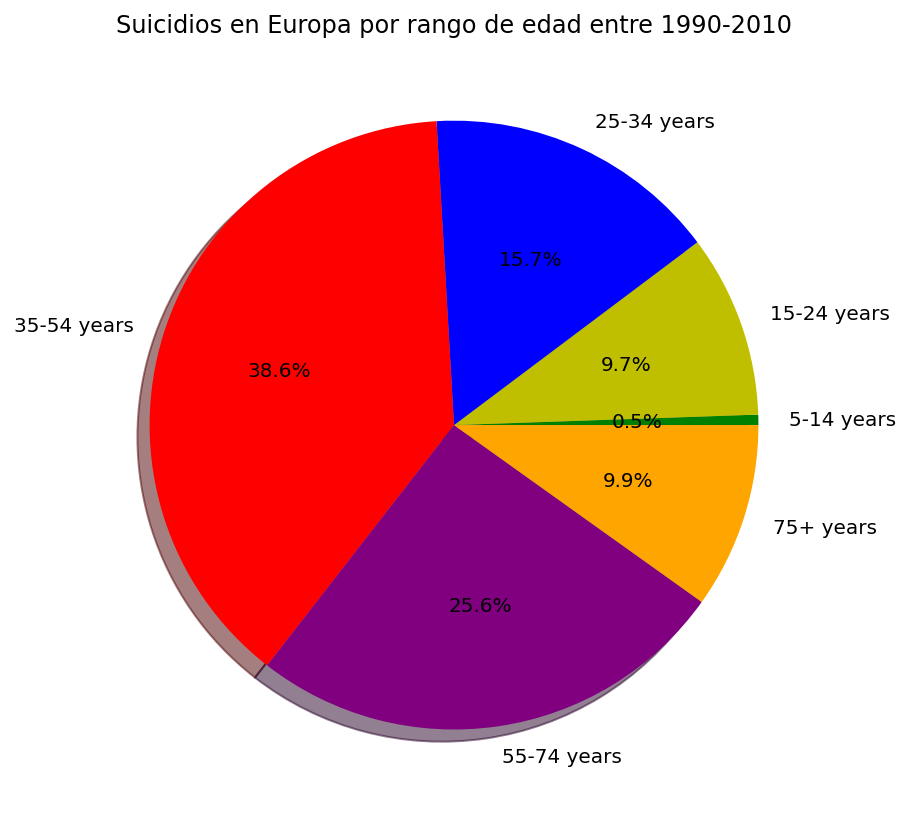

In [355]:
sc_15_24_to_eu = total_suicides_by_age_eu[0]
sc_25_34_to_eu = total_suicides_by_age_eu[1]
sc_35_54_to_eu = total_suicides_by_age_eu[2]
sc_5_14_to_eu = total_suicides_by_age_eu[3]
sc_55_74_to_eu = total_suicides_by_age_eu[4]
sc_75_to_eu = total_suicides_by_age_eu[5]
plt.pie(
    # Valores a representar
    [sc_5_14_to_eu, sc_15_24_to_eu, sc_25_34_to_eu, sc_35_54_to_eu, sc_55_74_to_eu, sc_75_to_eu],
    # Etiquetas
    labels = ['5-14 years', '15-24 years', '25-34 years', '35-54 years',  '55-74 years', '75+ years'],
    # Sombra
    shadow = True,
    # Colores
    colors = ['g', 'y', 'b', 'r', 'purple', 'orange'],
    # Ángulo de inicio
    startangle = 0,
    # Mostramos el valor como un valor porcentual con un dígito decimal
    autopct = '%1.1f%%'
    )

# Especificamos el título del gráfico
plt.title("Suicidios en Europa por rango de edad entre 1990-2010")

# Mostramos el gráfico
plt.show()